# Simulating a plant with time-dependent control actions

Assume that we have a plant with some simple dynamics described by this transfer function:

$$G(s) = \frac{1}{s^2 + 2s + 1}$$

We can define the system in `python-control` by doing:

In [1]:
import control
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

G_s = control.tf([1.5],[1,0.5,1])
G_s


      1.5
---------------
s^2 + 0.5 s + 1

### Step Response: `control.step_response`
Here's how to get the step response and plot the output:

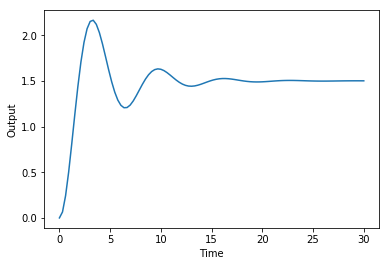

In [2]:
# Generate a step response
T = np.linspace(0,30,100)
t, yout = control.step_response(G_s,T)

# Plot
plt.figure()
plt.xlabel('Time')
plt.ylabel('Output')
plt.plot(t,yout)

## Output with control actions: `control.forced_response`
What if we want to introduce the step at time $t=20$s? We can do this by using `control.forced_response` and feeding in an input vector, $u$.

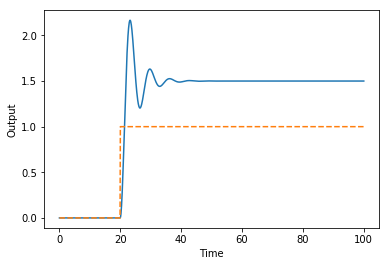

In [3]:
# Generate a step response
T = np.linspace(0,100,1000)

# Our input is all zero, until t=20
U = np.ones(len(T))
U[:200] = 0

t, yout, _ = control.forced_response(G_s, T, U)

# Plot
plt.figure()
plt.xlabel('Time')
plt.ylabel('Output')
plt.plot(t,yout)
plt.plot(t,U, '--')

Here's the response with 2 control actions, one at $t=20$s and another one at $t=60$s:

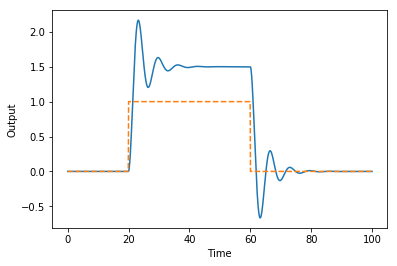

In [4]:
# Generate a step response
T = np.linspace(0,100,1000)

# Our input is one between t=20 and t=60
U = np.zeros(len(T))
U[200:600] = 1

t, yout, _ = control.forced_response(G_s, T, U)

# Plot
plt.figure()
plt.xlabel('Time')
plt.ylabel('Output')
plt.plot(t,yout)
plt.plot(t,U, '--')

## Animated plant outputs
Let's create some animations.

In [5]:
# Start by importing our animation libraries
%config InlineBackend.figure_formats = {'svg',}
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
from IPython.display import display
import warnings
warnings.filterwarnings('ignore') #suppress all warnings
from matplotlib import animation
from IPython.display import HTML

In [6]:
# Generate a step response
T = np.linspace(0,100,100)

# Our input is one between t=20 and t=60
U = np.zeros(len(T))
U[20:60] = 1

t, yout, _ = control.forced_response(G_s, T, U)

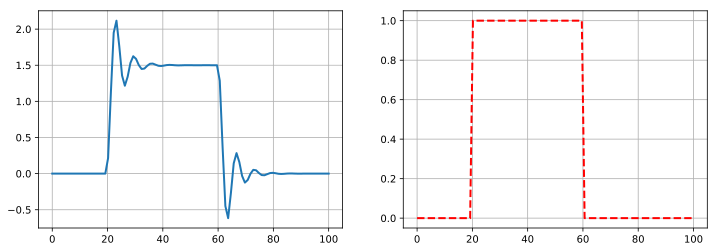

In [7]:
# Create sub plots
gs = gridspec.GridSpec(1, 2)
f = plt.figure(figsize=(12,4));
ax1 = plt.subplot(gs[0, 0]); # row 0, col 0
ax1.grid(True, which='both');
ax2 = plt.subplot(gs[0, 1]); # row 0, col 1
ax2.grid(True, which='both');
line1, = ax1.plot(t, yout, lw=2);
line2, = ax2.plot(t, U, lw=2, linestyle='--', color='r');

# The animation function. This is called sequentially, frame by frame, to create the animated plot.
def drawframe(n): 
    line1.set_data(t[0:n], yout[0:n])
    line2.set_data(t[0:n], U[0:n])
    
    # Print out the current frame using "\r", the 'carriage return' character, as our end character.
    # This makes Python print the frame on the same line.
    print("Frame: {:0d}".format(n), end="\r")
    return (line1,line2)

In [8]:
# The `interval` parameter is the delay between frames in milliseconds and it controls the speed of the animation. 
anim = animation.FuncAnimation(f, drawframe, frames=len(t), interval=50)
HTML(anim.to_jshtml())